In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Load dataset
data = pd.read_csv(r"C:\Users\naren\Downloads\Mall_Customers.csv")

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#  Encode Gender
print("Unique Gender values before encoding:", data['Gender'].unique())
encoder = LabelEncoder()
data['Gender_encoded'] = encoder.fit_transform(data['Gender'])
print("Encoder classes:", encoder.classes_)

Unique Gender values before encoding: ['Male' 'Female']
Encoder classes: ['Female' 'Male']


In [4]:
# Create a composite feature from Age, Gender, Income
features_to_combine = ['Age', 'Gender_encoded', 'Annual Income (k$)']
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(data[features_to_combine])
data['Composite_Feature'] = combined_scaled.mean(axis=1)


In [5]:
# Prepare features for clustering 
X = data[['Gender_encoded', 'Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled = StandardScaler().fit_transform(X)

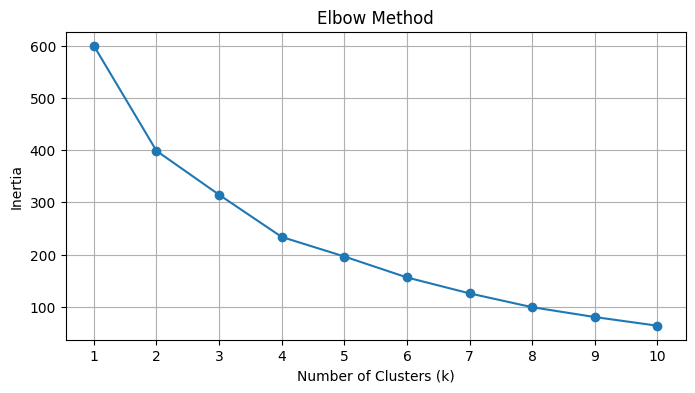

In [6]:
# Elbow method to determine optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [7]:
# Apply KMeans with optimal number of clusters 
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)


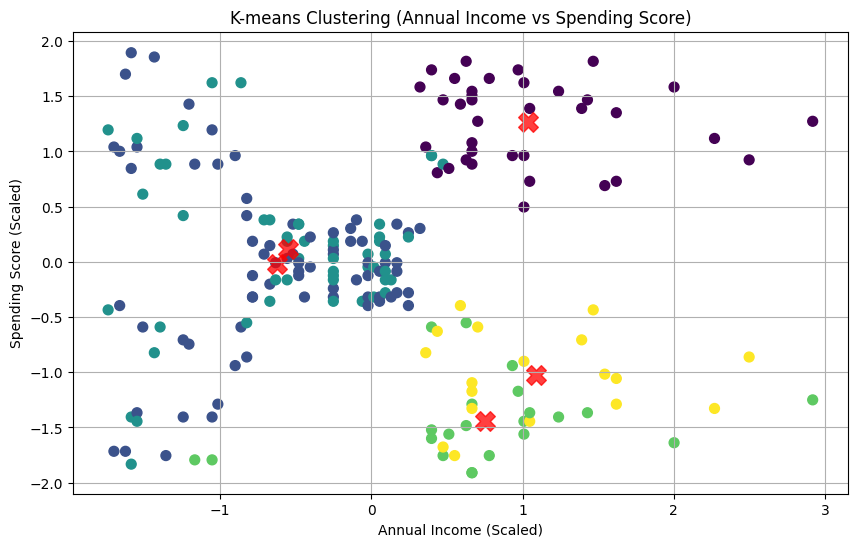

In [8]:
# Scatter plot of clusters 
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=data['Cluster'], s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering (Annual Income vs Spending Score)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.grid(True)
plt.show()

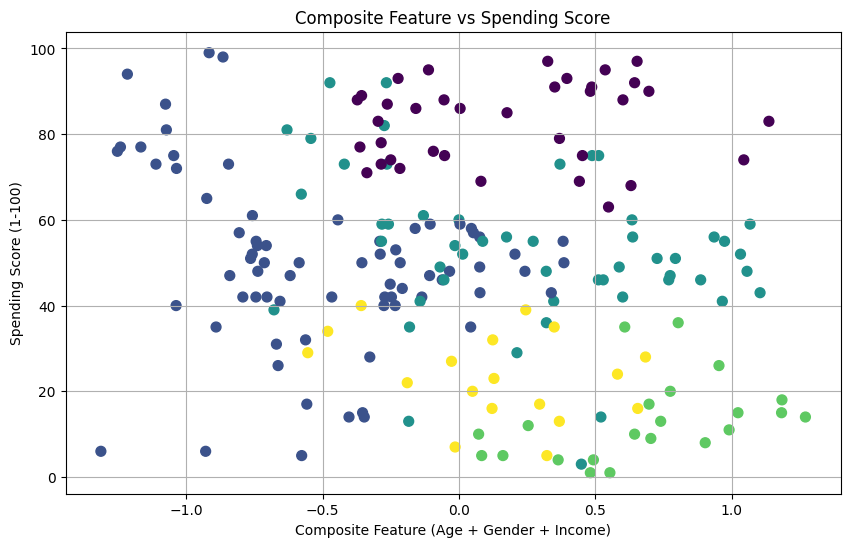

In [9]:
# Scatter plot of Composite Feature vs Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(data['Composite_Feature'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', s=50)
plt.title('Composite Feature vs Spending Score')
plt.xlabel('Composite Feature (Age + Gender + Income)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

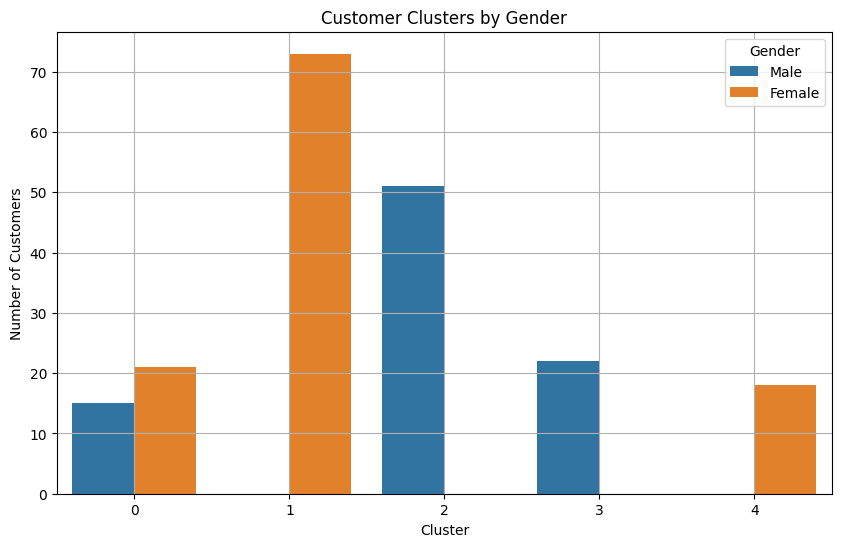

In [10]:
# Cluster division by Gender (count plot)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Cluster', hue='Gender')
plt.title('Customer Clusters by Gender')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.legend(title='Gender')
plt.show()

In [11]:
# Optional detailed stats for each cluster & gender
grouped_by_cluster_gender = data.groupby(['Cluster', 'Gender'])
print("\nCluster-wise analysis by Gender:")
for (cluster_id, gender), group in grouped_by_cluster_gender:
    print(f"\nCluster {cluster_id} - {gender}:")
    print(group[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe())



Cluster-wise analysis by Gender:

Cluster 0 - Female:
             Age  Annual Income (k$)  Spending Score (1-100)
count  21.000000           21.000000               21.000000
mean   32.190476           86.047619               81.666667
std     3.076021           14.157953                7.831560
min    27.000000           70.000000               69.000000
25%    30.000000           77.000000               75.000000
50%    32.000000           79.000000               83.000000
75%    35.000000           97.000000               88.000000
max    38.000000          120.000000               95.000000

Cluster 0 - Male:
             Age  Annual Income (k$)  Spending Score (1-100)
count  15.000000           15.000000               15.000000
mean   32.666667           90.200000               84.333333
std     4.353433           19.328735               11.474610
min    27.000000           69.000000               63.000000
25%    29.000000           77.500000               74.500000
50%    32.0